IN CLASS OCEAN EXAMPLE

In [12]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as seaborn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
4. Analysis of the best fit models from sections 2 and 3 to see if using data from the same geographic area results in a better model.

In [13]:
infile = 'jma_nitrate.csv'
#######
jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variale, if that is what you called it, example: data 
jma_df.head()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277


In [14]:
nitratefile = jma_df
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
x = nitratefilefiltered[["sal", "theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(x))
print(np.shape(y))

#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

(15574, 2)
(15574, 1)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range (7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes)
        mlp = MLPRegressor(hidden_layer_sizes=(layers,nodes), max_iter=500, random_state=4)
        mlp.fit(x_train, y_train)
        trainres = mlp.score(x_train, y_train)
        predictions = mlp.predict(x_test)
        accresults = mlp.score(x_test, y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved = []
print(results)

c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_mult

[[7, 7, 0.9157024890919858, 0.9207134615736476], [7, 8, 0.916214415949869, 0.9213702094230027], [7, 9, 0.9140805225254501, 0.9179172139911385], [8, 7, 0.8386045826155389, 0.8407529890519759], [8, 8, 0.9197392507654927, 0.9243773039688101], [8, 9, 0.918757317681195, 0.9238267500300408], [9, 7, 0.9183411792239595, 0.922922798631314], [9, 8, 0.9192861924772723, 0.9242459411706762], [9, 9, 0.9146041230363338, 0.9187622669459593]]


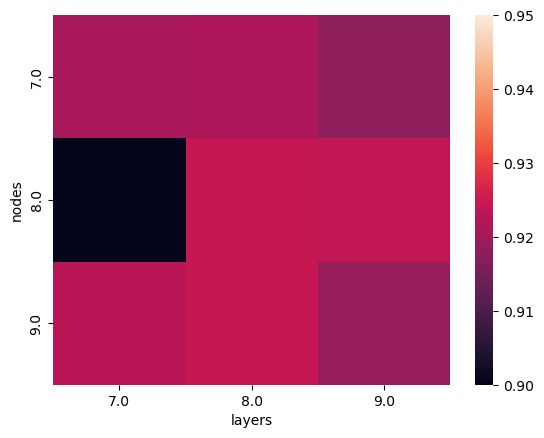

In [17]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='Z')
ax = sns.heatmap(data_pivoted,vmin=0.9, vmax=0.95)
plt.show()